In [1]:
import pandas as pd
rainfall_data = pd.read_csv("rainfall_area_2000-2015.csv")
print(rainfall_data.head())

  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  2000  19.0  27.0  18.6  35.0  73.5  184.5  267.6  225.2  135.3   
1  INDIA  2001   7.2  10.3  21.3  45.5  61.3  215.1  281.1  210.0  109.2   
2  INDIA  2002  16.8  21.0  22.9  38.9  57.7  170.1  138.9  246.2  133.9   
3  INDIA  2003   7.2  42.1  33.7  35.5  38.6  164.5  305.6  247.8  179.9   
4  INDIA  2004  26.2  10.7  11.9  50.6  74.5  167.8  241.7  252.5  123.6   

    OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0  40.6  14.7   9.6  1050.4     46.0    127.1    812.5     64.9  
1  97.7  18.5   6.0  1083.3     17.5    128.1    815.4    122.2  
2  54.4  14.7   5.2   920.8     37.8    119.5    689.2     74.3  
3  92.7  10.2  16.6  1174.5     49.3    107.8    897.8    119.5  
4  88.8  16.9   6.1  1071.3     36.9    137.0    785.7    111.7  


In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# analyze trends in annual rainfall over time
annual_rainfall = rainfall_data[['YEAR', 'ANNUAL']]

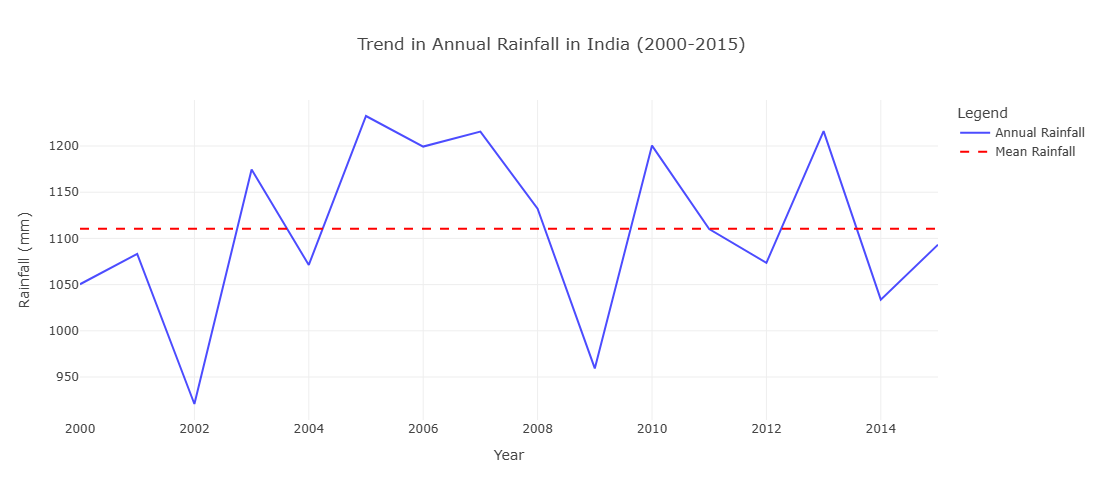

In [12]:
fig_annual = go.Figure()
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=annual_rainfall['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.7
))
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=[annual_rainfall['ANNUAL'].mean()] * len(annual_rainfall),
    mode='lines',
    name='Mean Rainfall',
    line=dict(color='red', dash='dash')
))
fig_annual.update_layout(
    title='Trend in Annual Rainfall in India (2000-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='gridon',
    legend=dict(title="Legend"),
    height=500
)
fig_annual.show()

The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. The red dashed line indicates the mean rainfall, around which the annual rainfall oscillates. Notable peaks and troughs highlight extreme rainfall events and dry years.

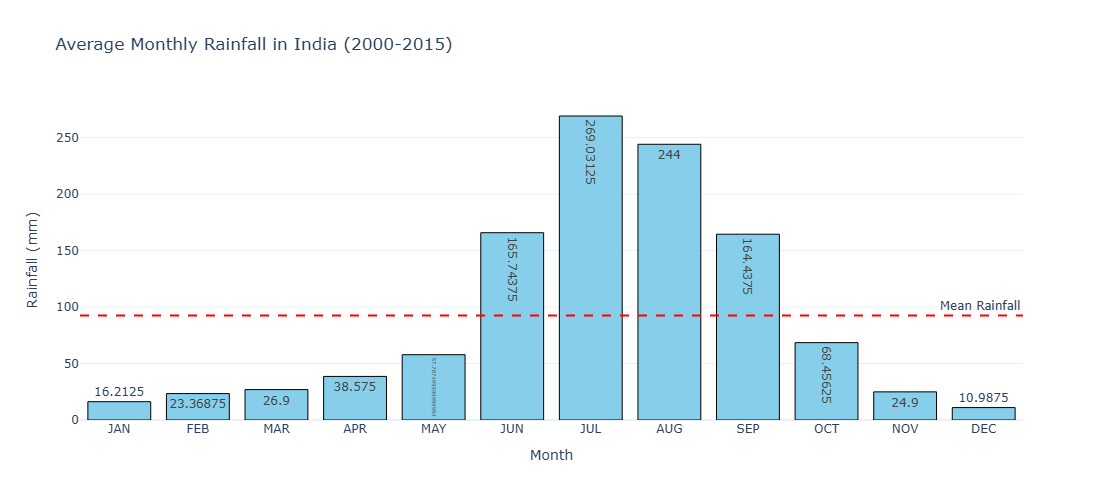

In [13]:
# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = rainfall_data[monthly_columns].mean()

highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()

fig_monthly = px.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels={'x': 'Month', 'y': 'Rainfall (mm)'},
    title='Average Monthly Rainfall in India (2000-2015)',
    text=monthly_avg.values
)
fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash="dash",
    line_color="red",
    annotation_text="Mean Rainfall",
    annotation_position="top right"
)
fig_monthly.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)
fig_monthly.update_layout(template='plotly_white', height=500)
fig_monthly.show()

This bar chart illustrates a highly uneven distribution of rainfall across months, with July and August receiving the highest average rainfall. The red dashed line represents the mean monthly rainfall, showing that most months receive rainfall below the average, except during the monsoon months (June to September).

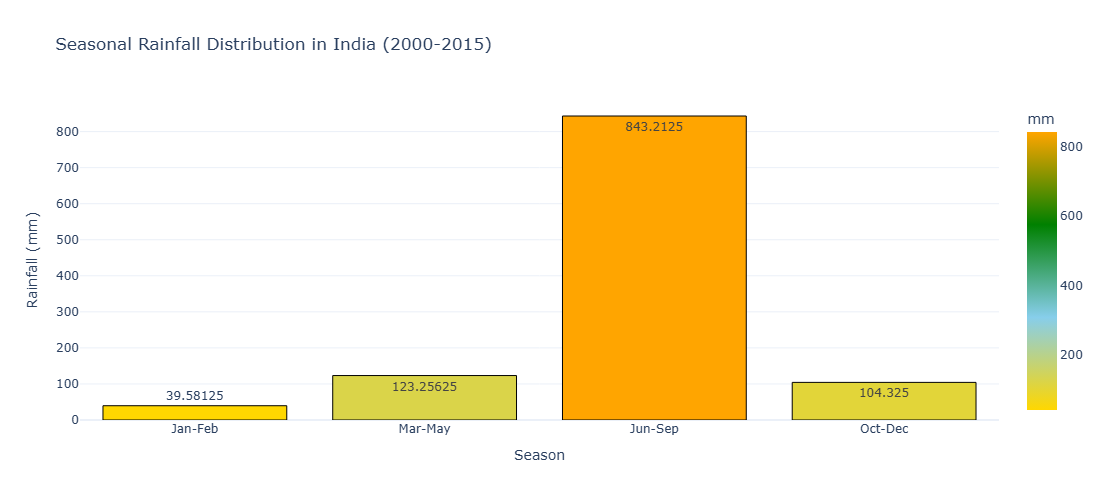

In [16]:
# seasonal rainfall distribution
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = rainfall_data[seasonal_columns].mean()

fig_seasonal = px.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x': 'Season', 'y': 'Rainfall (mm)'},
    title='Seasonal Rainfall Distribution in India (2000-2015)',
    text=seasonal_avg.values,
    color=seasonal_avg.values,
    color_continuous_scale=['gold', 'skyblue', 'green', 'orange']
)
fig_seasonal.update_traces(marker_line_color='black', marker_line_width=1)
fig_seasonal.update_layout(
    template='plotly_white',
    height=500,
    coloraxis_colorbar=dict(title='mm')
)
fig_seasonal.update_layout(template='plotly_white', height=500)
fig_seasonal.show()

The seasonal distribution highlights the dominance of the monsoon season (June to September), which contributes the bulk of annual rainfall (around 890 mm). In contrast, the other seasons (January-February, March-May, and October-December) contribute significantly less to the annual total, which emphasizes the critical role of the monsoon.